In [58]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.cluster import KMeans

In [2]:
os.chdir("D:\Fax\ECMI\ECMI_Data\data_1bit\AlpArray")

Read the data from hdf5-files

In [3]:
name_of_stations = ['FR.CALF.00.HHZ', 'FR.ENAUX.00.HHZ','FR.EILF.00.HHZ', 'FR.ESCA.01.HHZ', 'FR.ISO.00.HHZ','FR.MON.00.HHZ', 'FR.MVIF.00.HHZ' ,
         'FR.PRIMA.00.HHZ', 'FR.SAOF.00.HHZ', 'FR.SPIF.00.HHZ', 'FR.TURF.00.HHZ']
pairs_of_statation = []
for i in range(len(name_of_stations)):
    for j in range(i+1, len(name_of_stations)):
        pairs_of_statation.append([name_of_stations[i], name_of_stations[j]])

In [4]:
extracted_data = []
distances = {}
for day in range(183, 366):
    filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2016" + str(day) + '_local_pair_dist.txt'
    filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2016" + str(day) + ".h5"

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    for pair in pairs_of_statation:
        for line in splited_lines:
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                if pair[0] + " " + pair[1] not in distances.keys():
                    distances.update({pair[0] + " " + pair[1]: line[2]})
                extracted_data.append([data[int(line[5])], pair])
for day in range(1, 181):
    if day < 10:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "201700" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"201700" + str(day) + ".h5"
    elif day < 100:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "20170" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"20170" + str(day) + ".h5"
    else:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2017" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2017" + str(day) + ".h5"        

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    for pair in pairs_of_statation:
        for line in splited_lines:
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                if pair[0] + " " + pair[1] not in distances.keys():
                    distances.update({pair[0] + " " + pair[1]: line[2]})
                extracted_data.append([data[int(line[5])], pair])

In [5]:
sort_distances = [(v, k) for k, v in distances.items()] 
sort_distances = sorted(sort_distances, reverse=False)
sort_distances = [(k, v) for v, k in sort_distances]

In [6]:
pairs_and_values = {}
for pairs in pairs_of_statation:
    for data in extracted_data:
        if pairs == data[1]:
            if pairs[0] + " " + pairs[1] not in pairs_and_values:
                pairs_and_values.update({pairs[0] + " " + pairs[1]: data[1]})
            pairs_and_values[pairs[0] + " " + pairs[1]].append(data[0])

In [7]:
sorted_values = {}
avg_delay_per_day = 0
for key in pairs_and_values.keys():
    holder = pairs_and_values[key][2:]
    values = []
    for value in holder:
        values.extend(value[0])
        avg_delay_per_day += np.mean(np.array(value[0]))
    sorted_values.update({key:values})
    avg_delay_per_day /= len(holder)
avg_delay_per_day

0.7897380275256585

In [8]:
max_number_of_connection = 0
for value in sorted_values.values():
    if len(value) > max_number_of_connection:
        max_number_of_connection = len(value)
connections = {}
for key, value in sorted_values.items():
        if key not in connections:
            connections.update({key: len(value)/max_number_of_connection})

In [19]:
sort_connections = [(v, k) for k, v in connections.items()] 
#sort_connections = sorted(sort_connections, reverse=True)
sort_connections = [(k, v) for v, k in sort_connections]

In [41]:
import collections
od = collections.OrderedDict(sorted(distances.items()))

In [31]:
connecc = []
diss = []
for i in sort_connections:
    connecc.append(i[1])
for i in od.values():
    diss.append(float(i))
diss = np.array(diss)
diss /= np.max(diss)

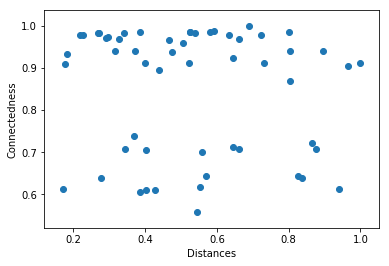

In [32]:
fig = plt.figure()
plt.scatter(diss, connecc)
plt.xlabel("Distances")
plt.ylabel("Connectedness")
plt.axis
plt.show()

7824


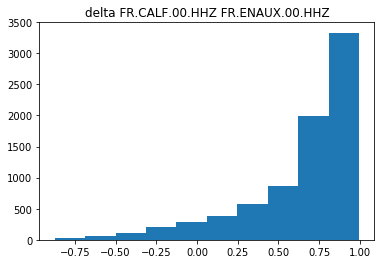

8448


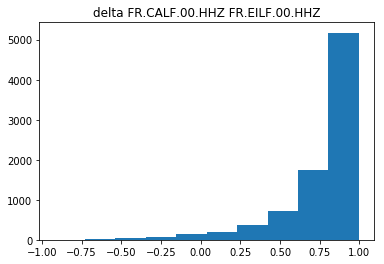

8448


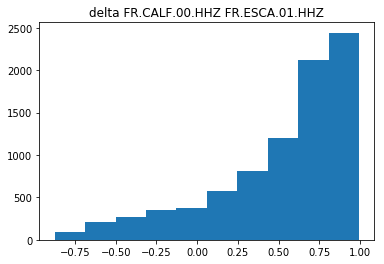

8568


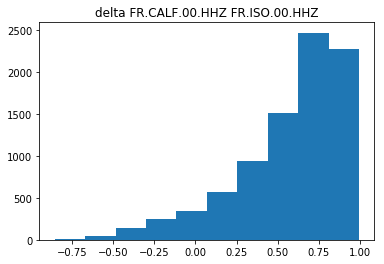

5520


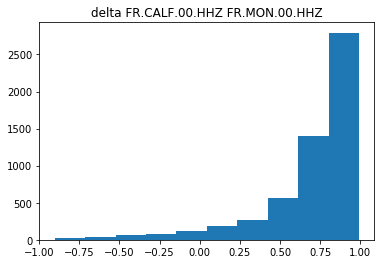

8424


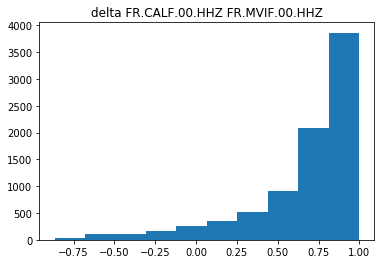

6336


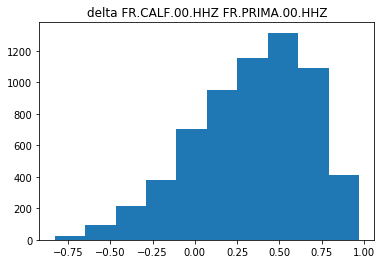

8064


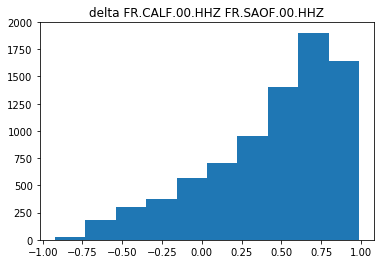

8472


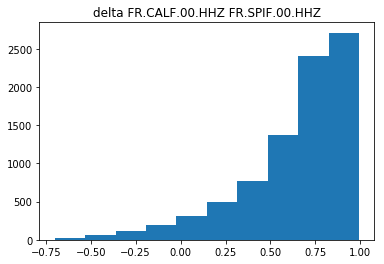

8376


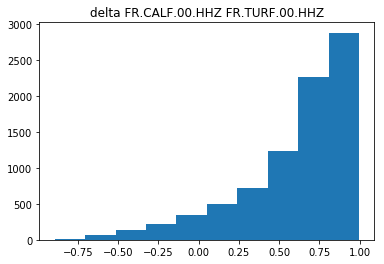

7824


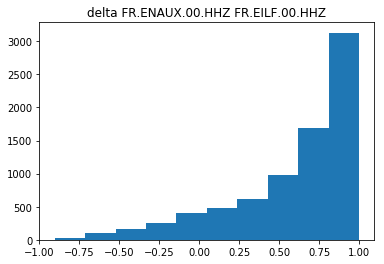

7824


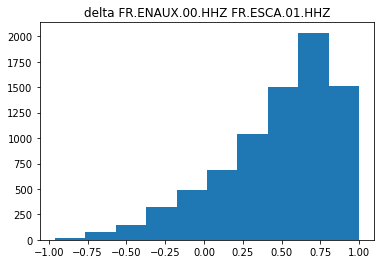

7680


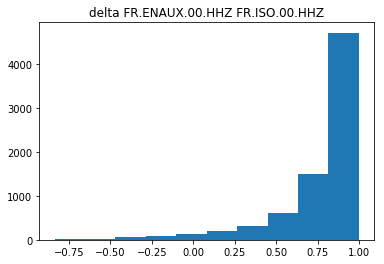

4776


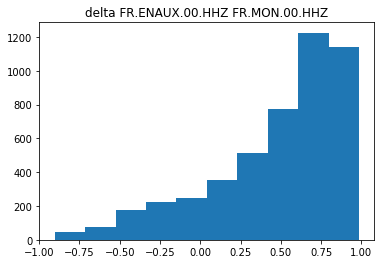

7800


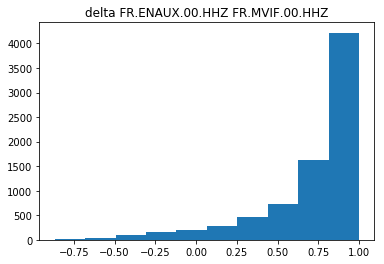

5472


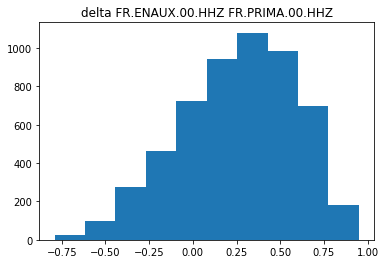

7440


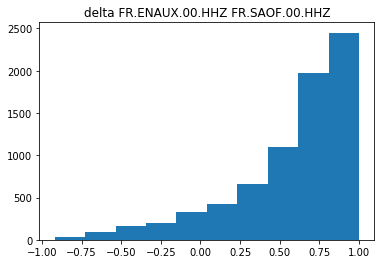

7824


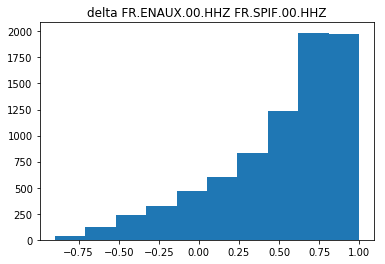

7752


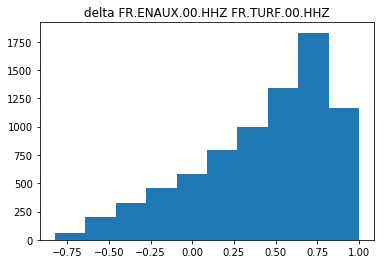

8448


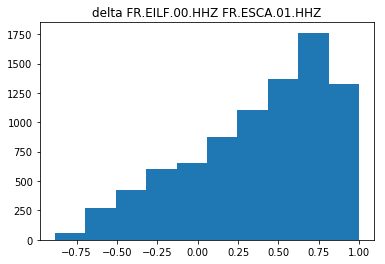

8304


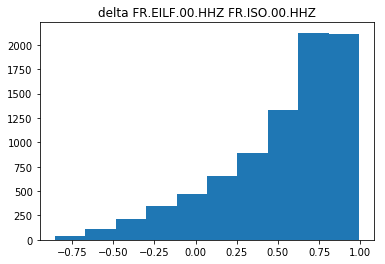

5256


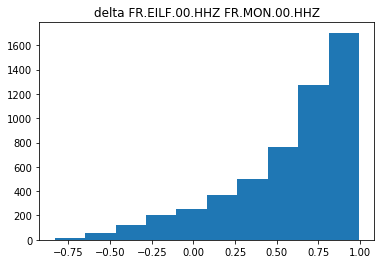

8424


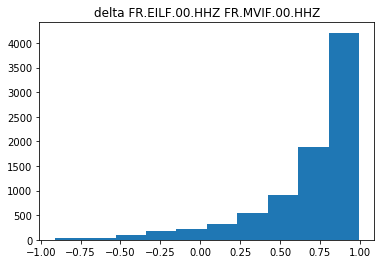

6072


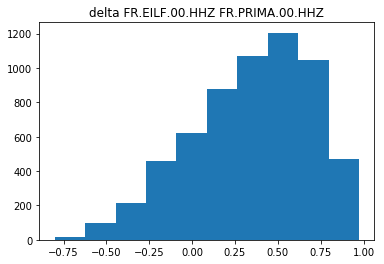

8064


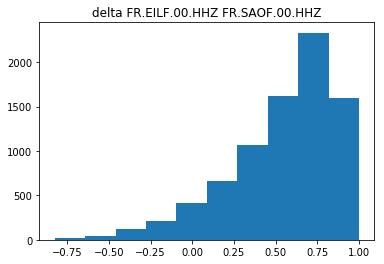

8448


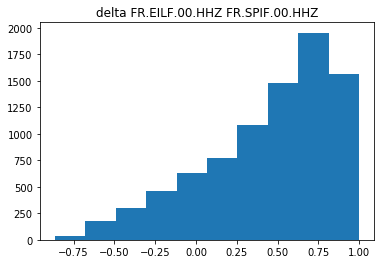

8376


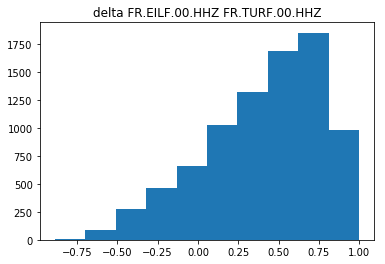

8304


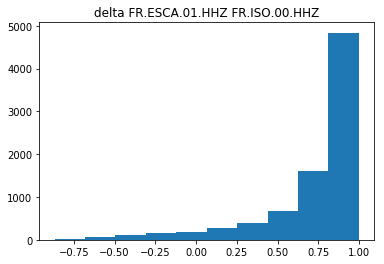

5256


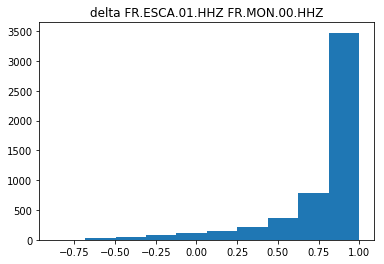

8424


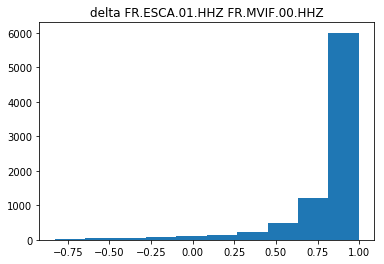

6072


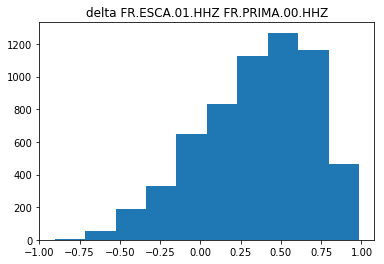

8064


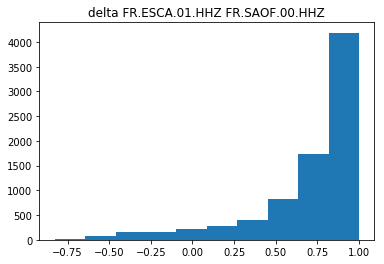

8448


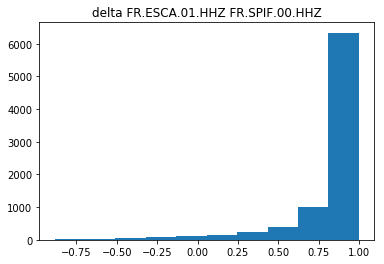

8376


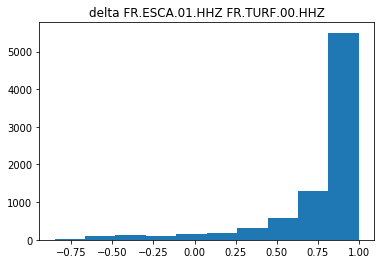

5520


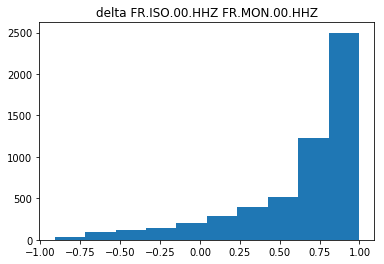

8280


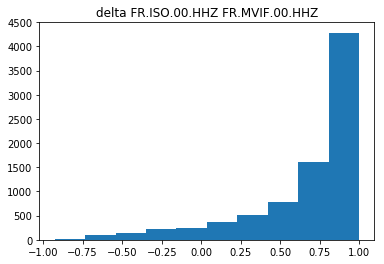

6192


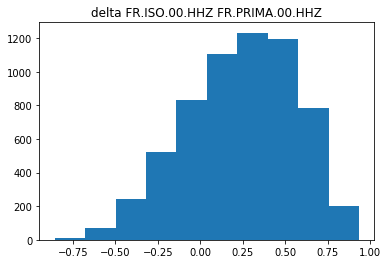

7920


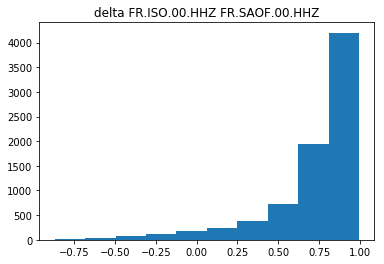

8328


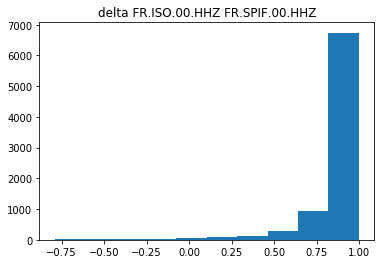

8232


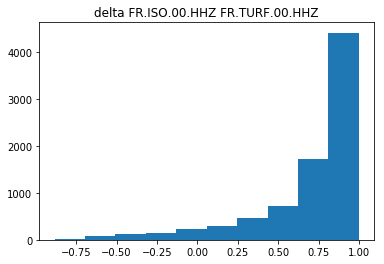

5232


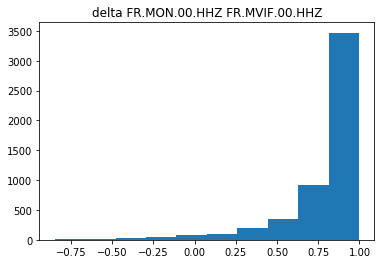

5472


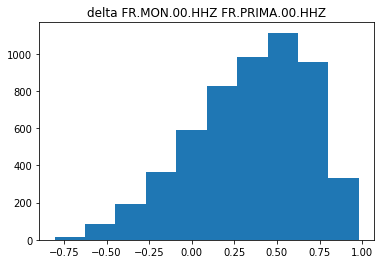

5232


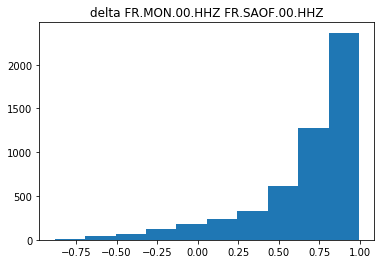

5280


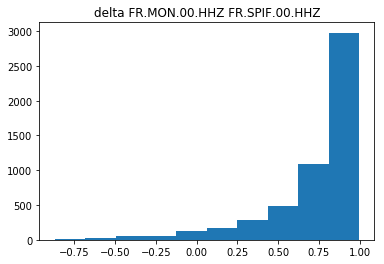

5184


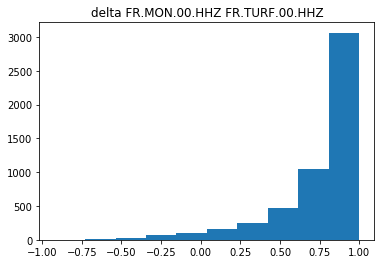

6048


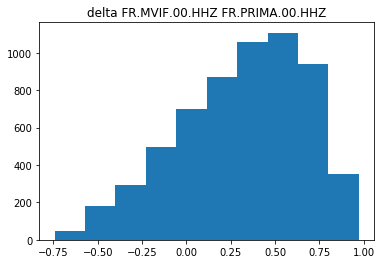

8040


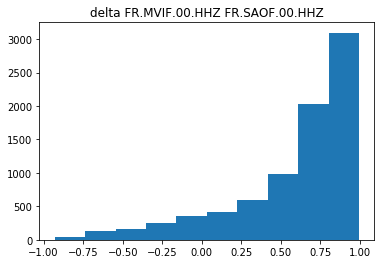

8424


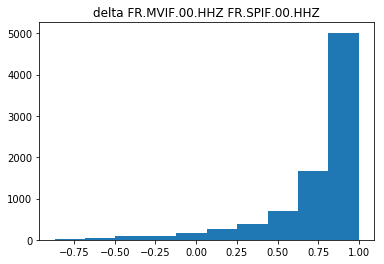

8352


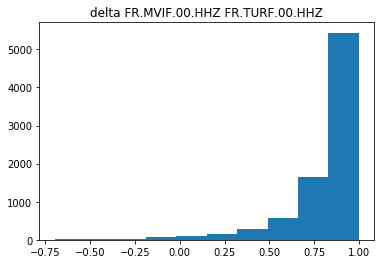

6072


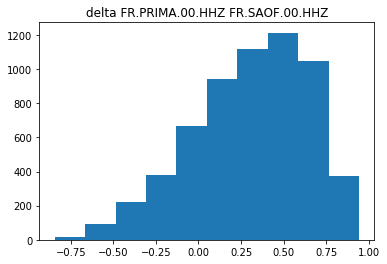

6096


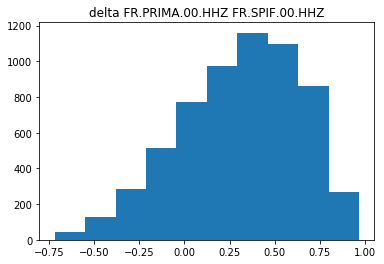

6000


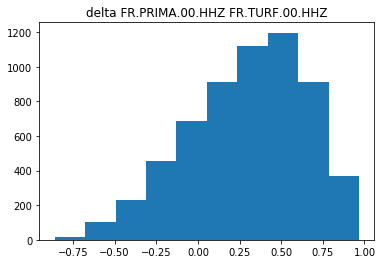

8064


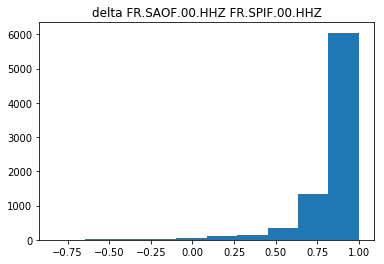

7992


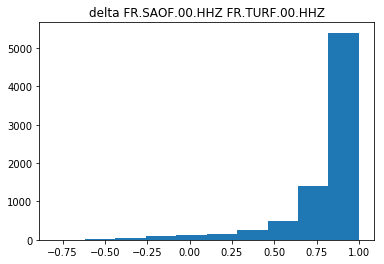

8376


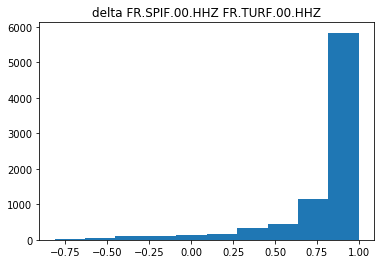

In [33]:
for keys, values in sorted_values.items():
    plt.hist(values)
    print(len(values))
    plt.title("delta %s" %(keys)) 
    plt.show()

In [40]:
delay_avg = []
for value in sorted_values.values():
    delay_avg.append(np.mean(value))

In [90]:
diss_delay_connect = []
for i in range(len(diss)):
    diss_delay_connect.append([diss[i], delay_avg[i], connecc[i]])

In [91]:
connet_delay_diss = []
for i in range(len(diss)):
    connet_delay_diss.append([connecc[i], delay_avg[i], diss[i]])

In [93]:
connet_diss_delay = []
for i in range(len(diss)):
    connet_diss_delay.append([connecc[i], diss[i], delay_avg[i]])

In [94]:
kmeans1 = KMeans(n_clusters=3, random_state=0, tol=0.0000001).fit(diss_delay_connect)
kmeans2 = KMeans(n_clusters=3, random_state=0, tol=0.0000001).fit(connet_delay_diss)
kmeans3 = KMeans(n_clusters=3, random_state=0, tol=0.0000001).fit(connet_diss_delay)

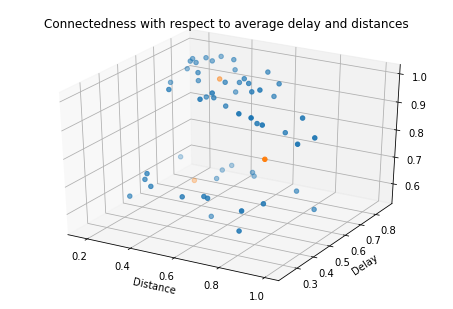

In [96]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Distance")
plt.ylabel("Delay")
plt.title("Connectedness with respect to average delay and distances")
ax.scatter(diss, delay_avg, connecc)
ax.scatter(kmeans1.cluster_centers_.T[0], kmeans1.cluster_centers_.T[1], kmeans1.cluster_centers_.T[2])
pyplot.show()

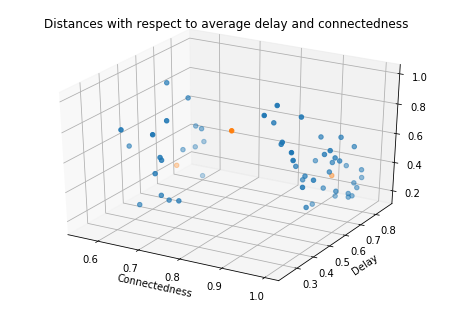

In [97]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Connectedness")
plt.ylabel("Delay")
plt.title("Distances with respect to average delay and connectedness")
ax.scatter(connecc, delay_avg, diss)
ax.scatter(kmeans2.cluster_centers_.T[0], kmeans2.cluster_centers_.T[1], kmeans2.cluster_centers_.T[2])
pyplot.show()

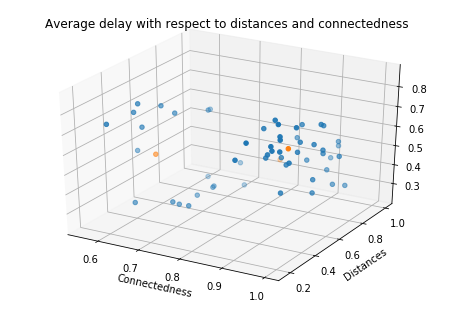

In [98]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Connectedness")
plt.ylabel("Distances")
plt.title("Average delay with respect to distances and connectedness")
ax.scatter(connecc, diss, delay_avg)
ax.scatter(kmeans3.cluster_centers_.T[0], kmeans3.cluster_centers_.T[1], kmeans3.cluster_centers_.T[2])
pyplot.show()

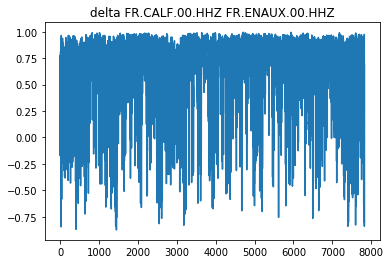

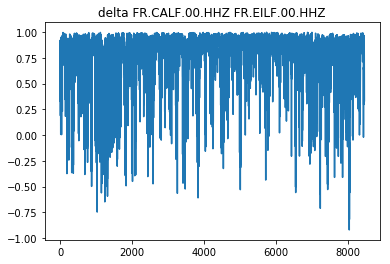

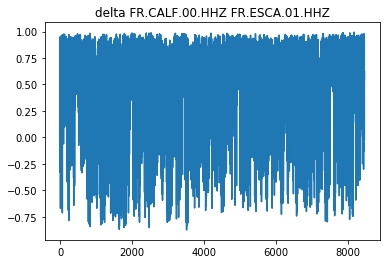

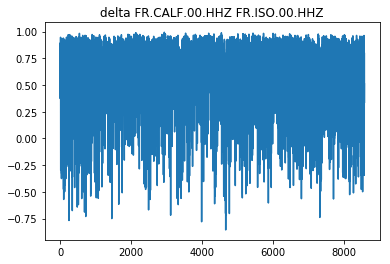

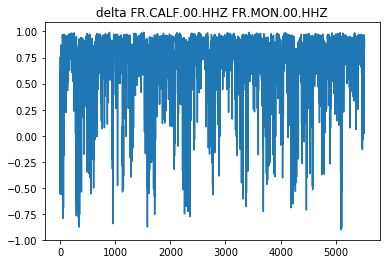

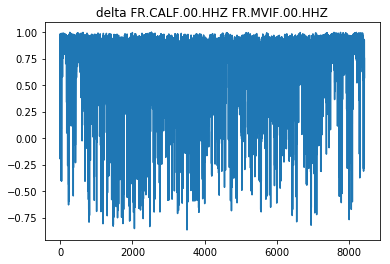

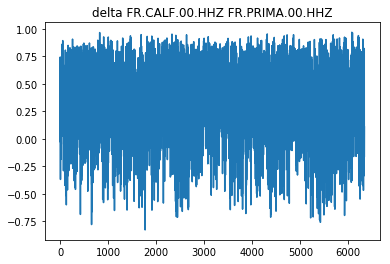

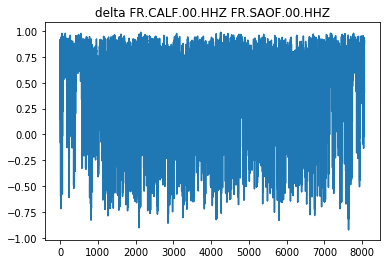

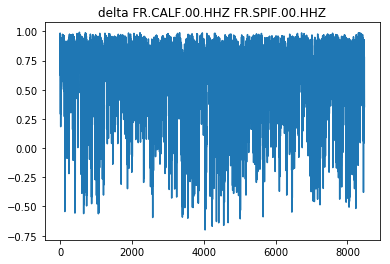

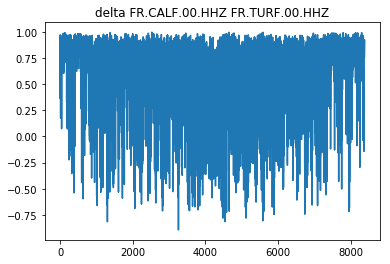

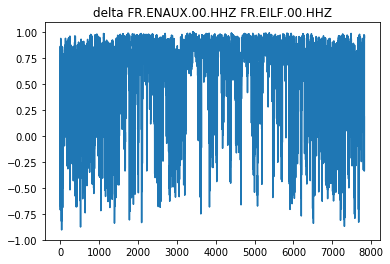

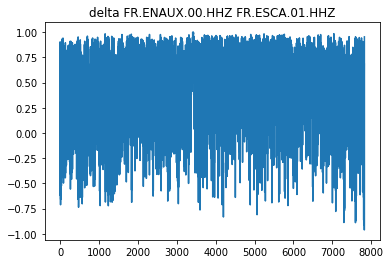

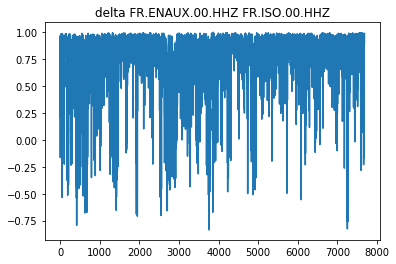

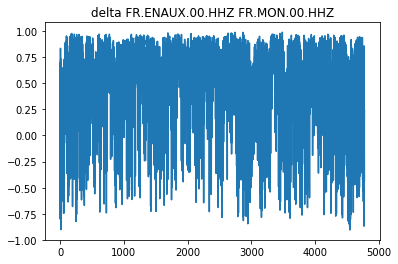

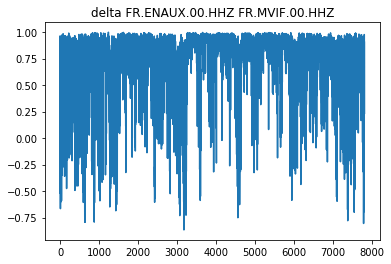

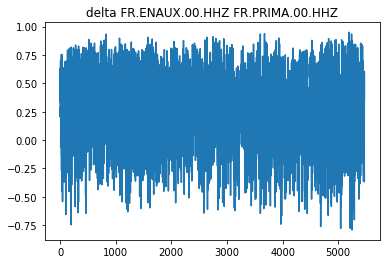

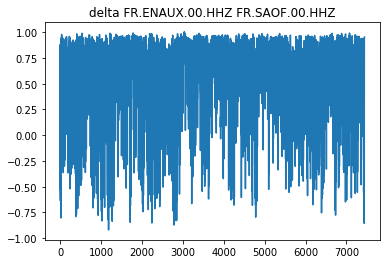

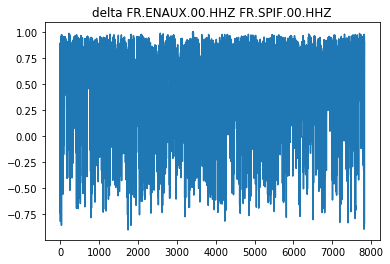

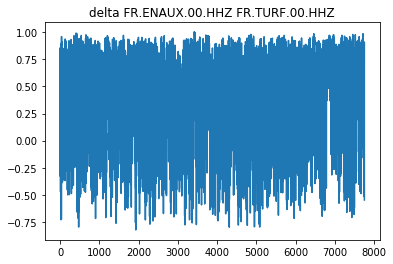

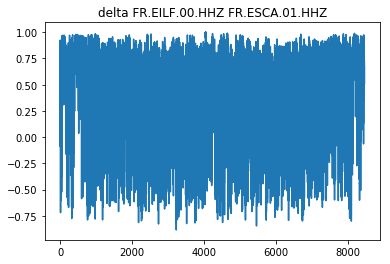

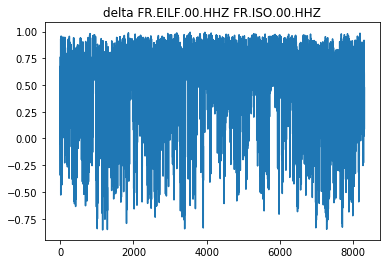

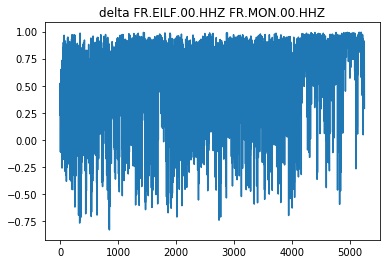

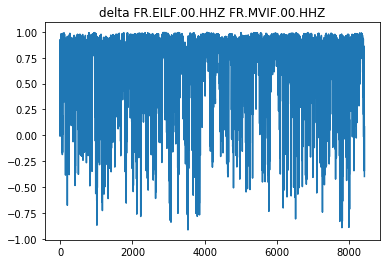

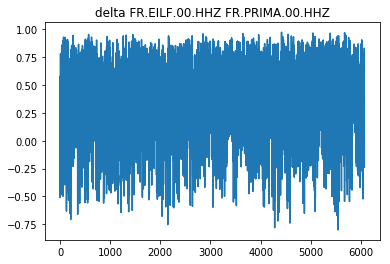

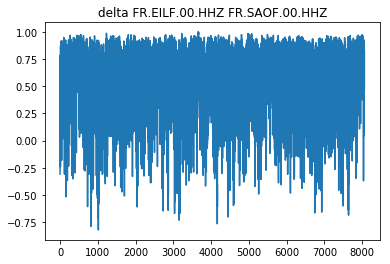

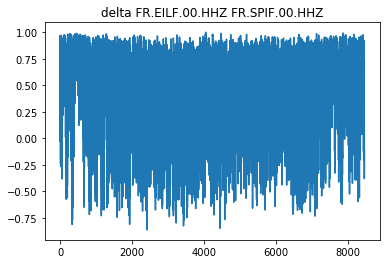

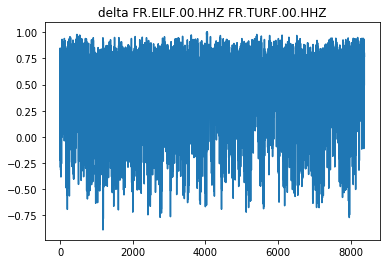

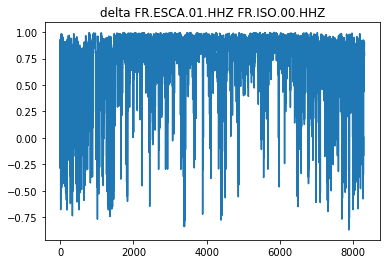

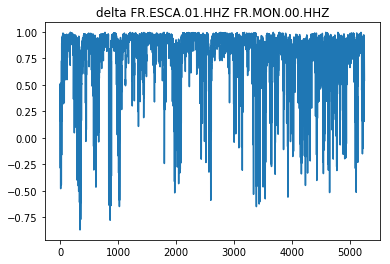

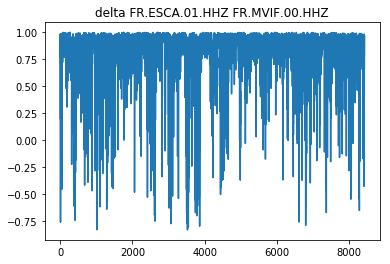

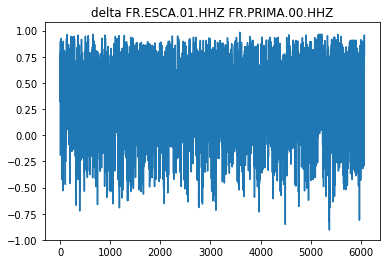

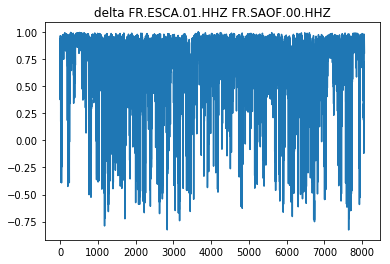

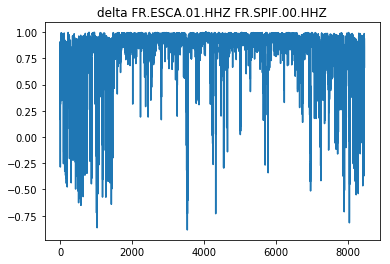

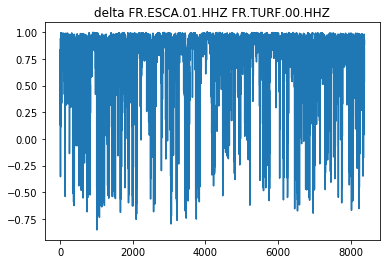

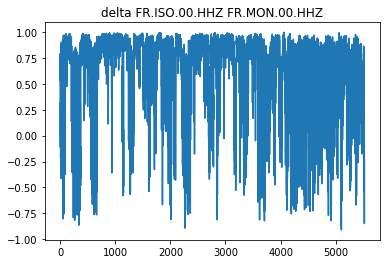

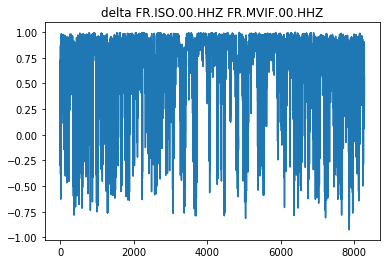

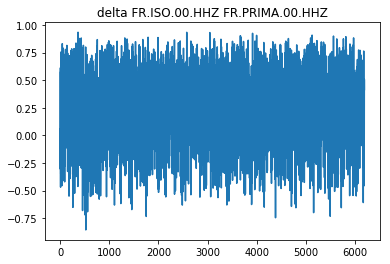

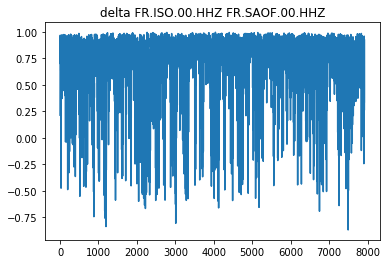

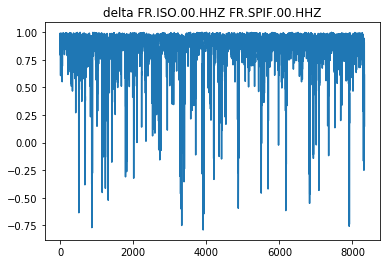

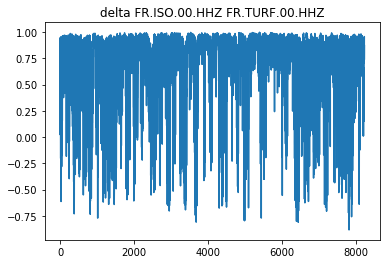

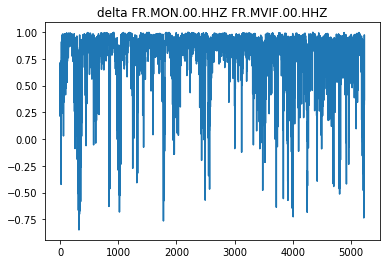

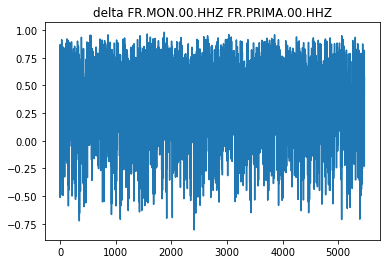

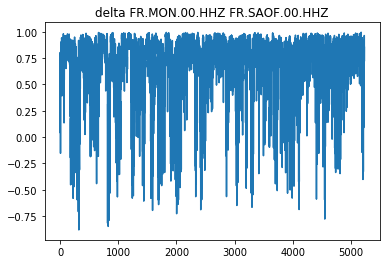

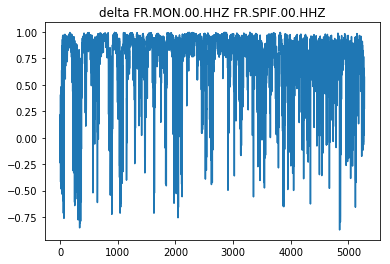

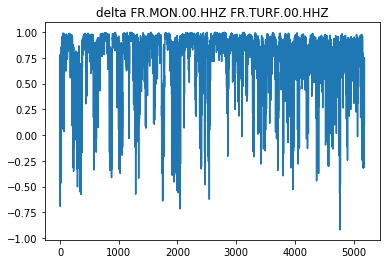

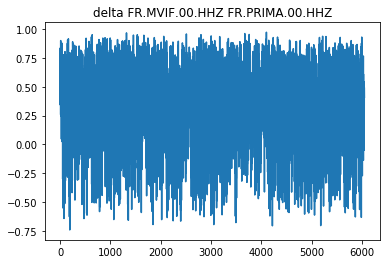

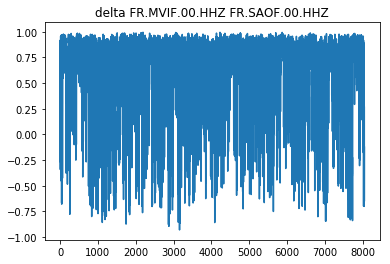

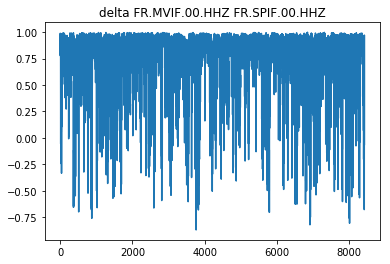

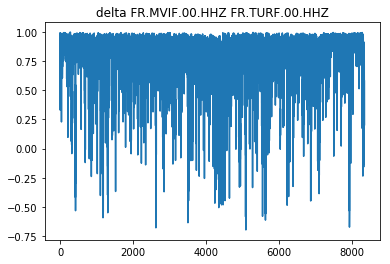

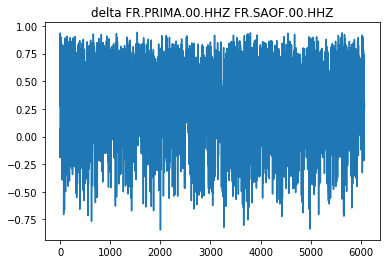

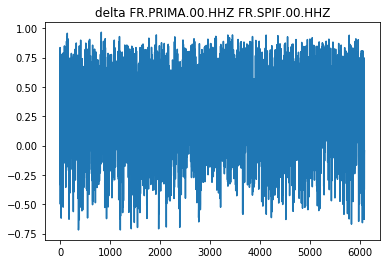

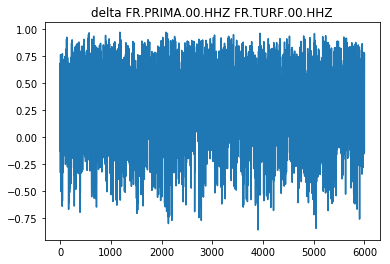

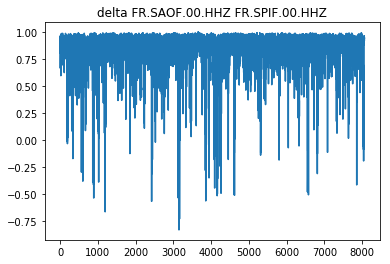

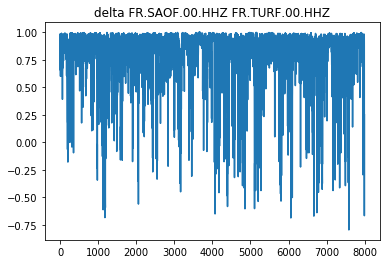

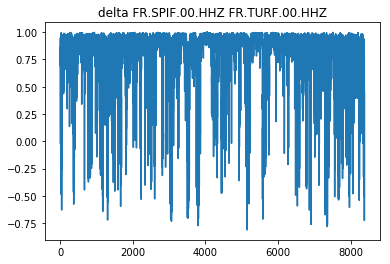

In [38]:
for keys, values in sorted_values.items():
    plt.plot(values)
    plt.title("delta %s" %(keys)) 
    plt.show()

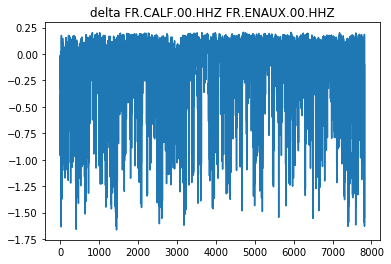

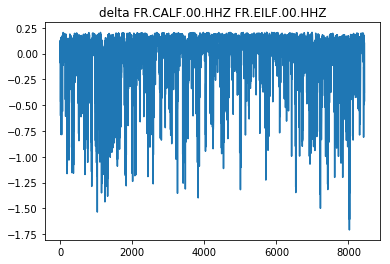

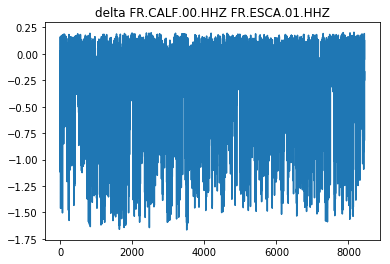

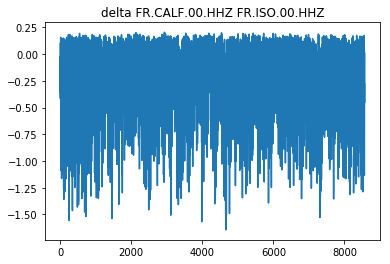

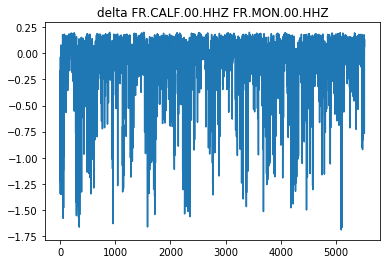

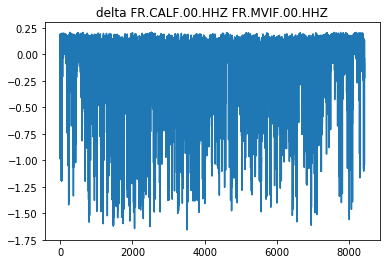

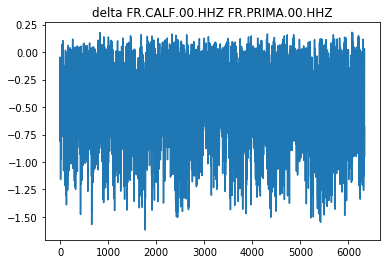

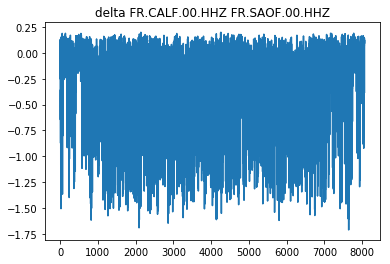

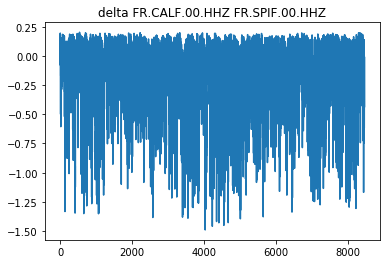

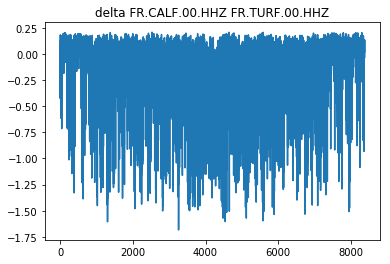

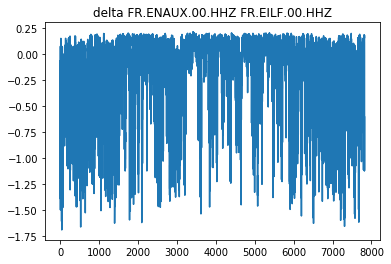

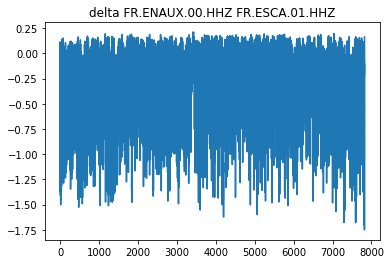

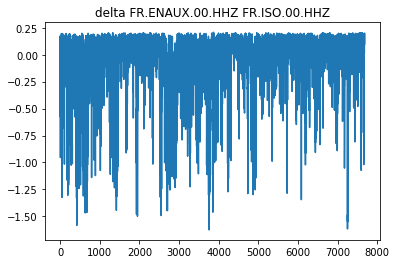

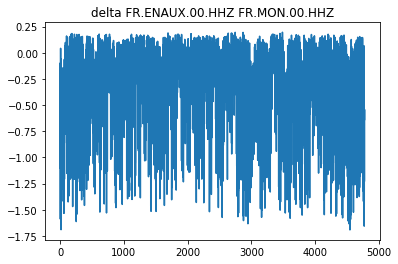

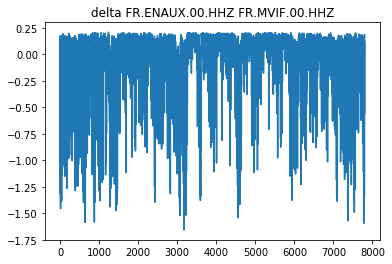

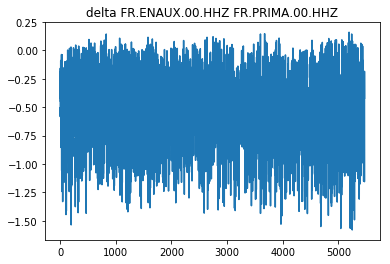

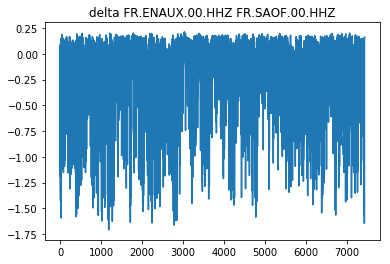

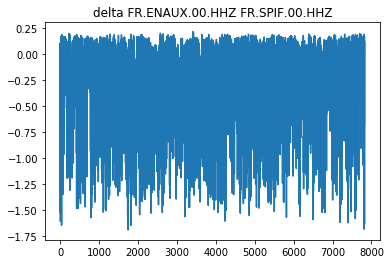

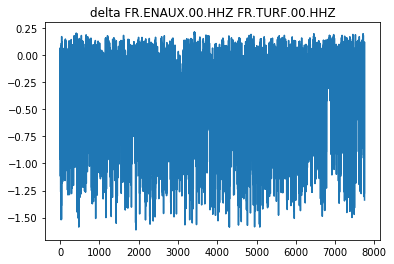

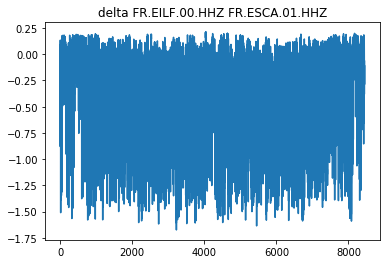

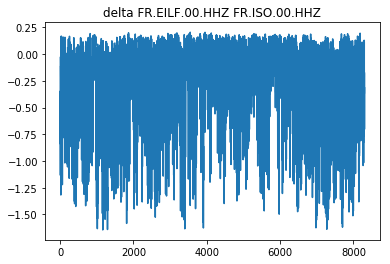

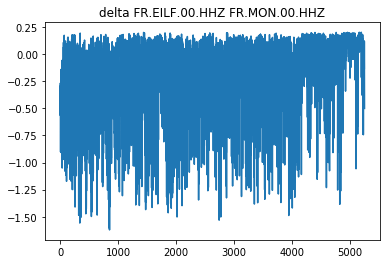

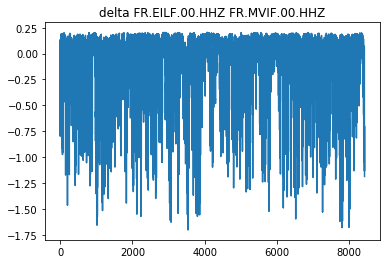

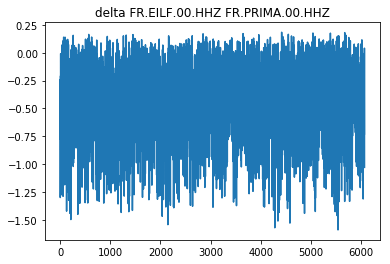

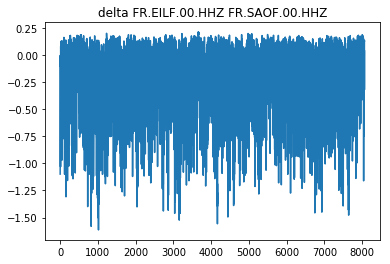

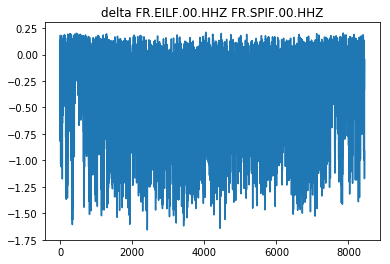

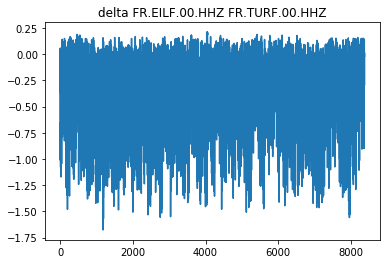

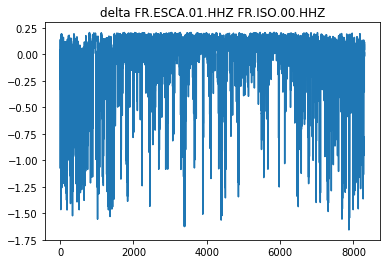

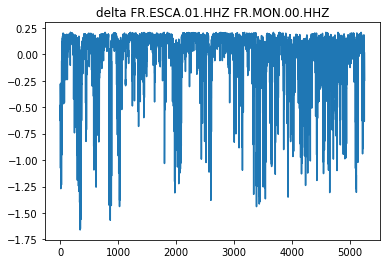

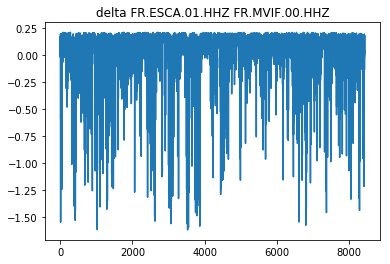

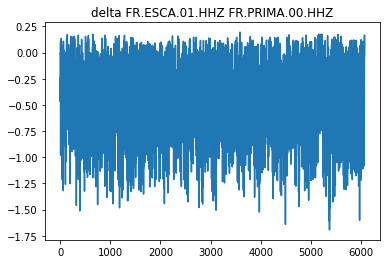

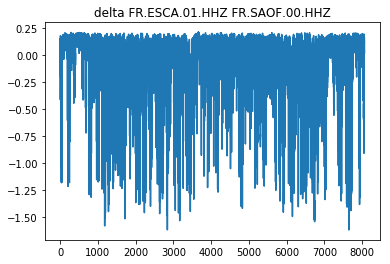

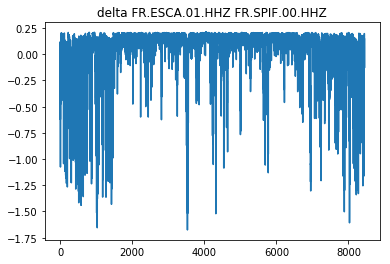

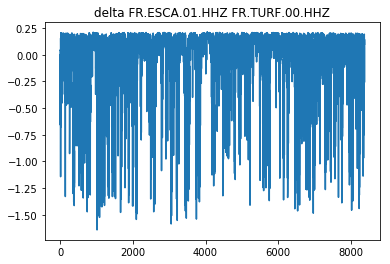

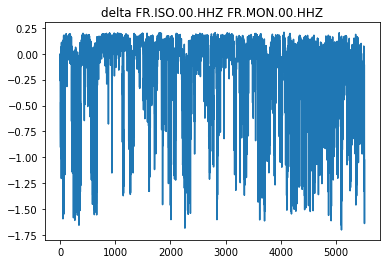

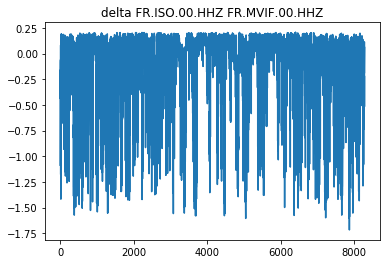

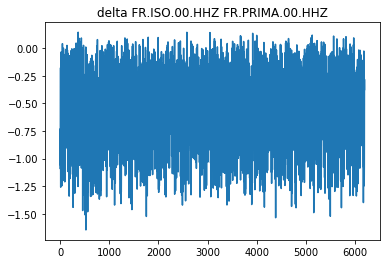

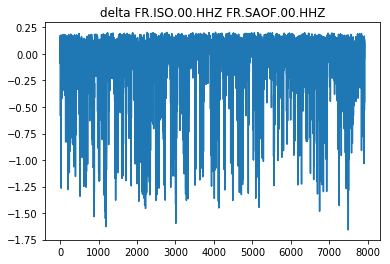

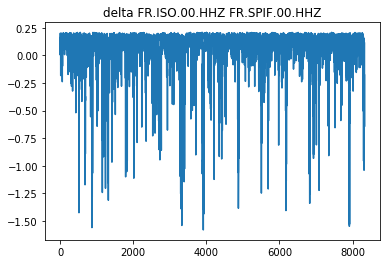

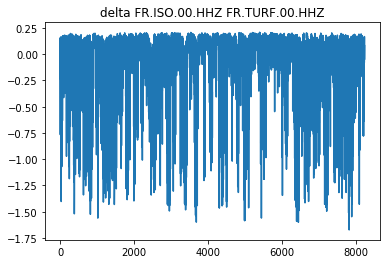

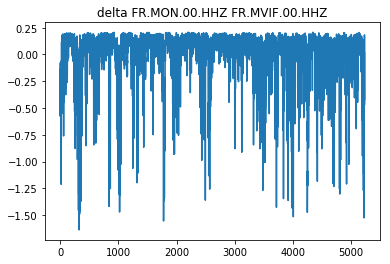

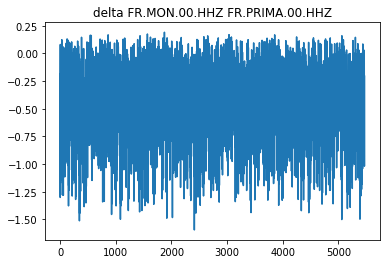

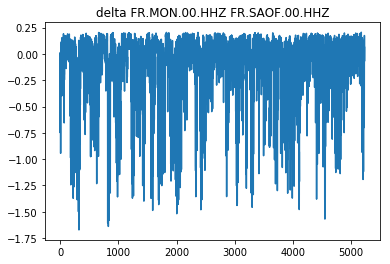

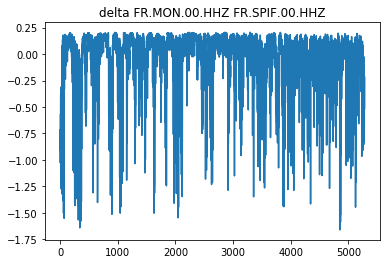

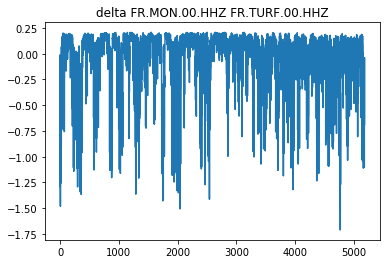

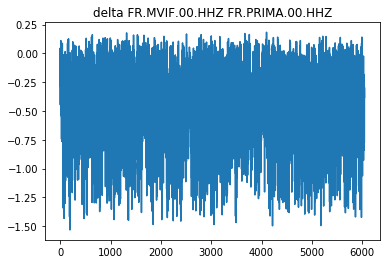

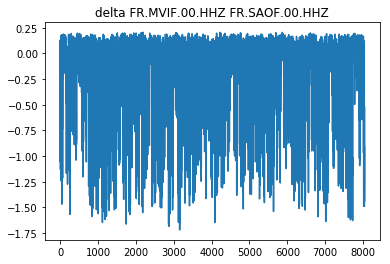

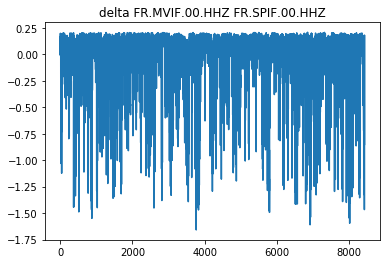

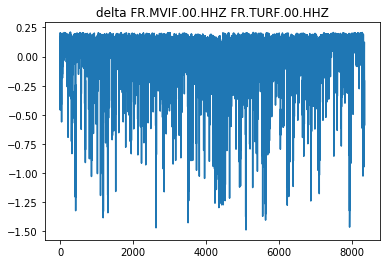

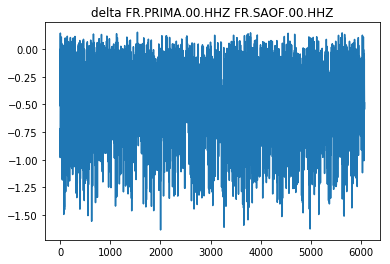

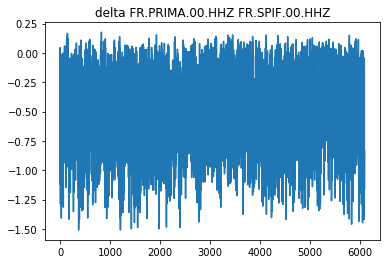

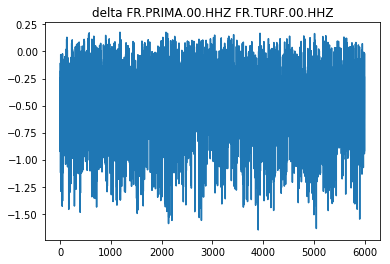

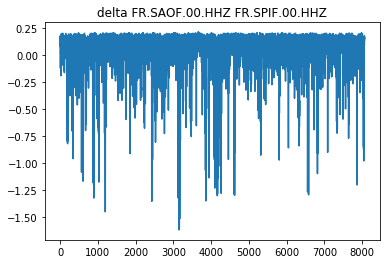

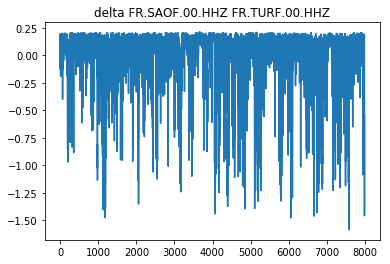

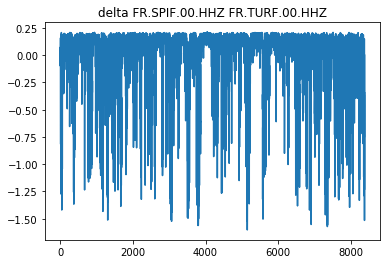

In [99]:
for keys, values in sorted_values.items():
    plt.plot(values-avg_delay_per_day)
    plt.title("delta %s" %(keys)) 
    plt.show()

In [ ]:
"""for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1, value2, mode='full'))
            print(key1, key2)
            plt.title("%s and %s") %(key1, key2)
            plt.show()
"""

In [103]:
"""for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1-avg_delay_per_day, value2-avg_delay_per_day, mode='full'))
            print(key1, key2)
            plt.show()
"""

"for key1, value1 in sorted_values.items():\n    for key2, value2 in sorted_values.items():\n        if value1 != value2:\n            plt.plot(np.correlate(value1-avg_delay_per_day, value2-avg_delay_per_day, mode='full'))\n            print(key1, key2)\n            plt.show()\n"

D:\Anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


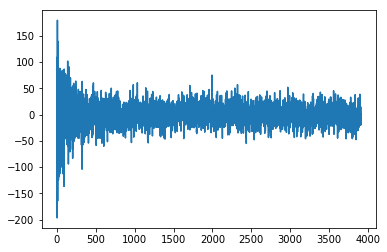

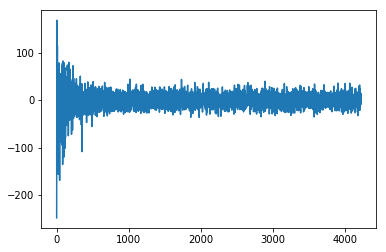

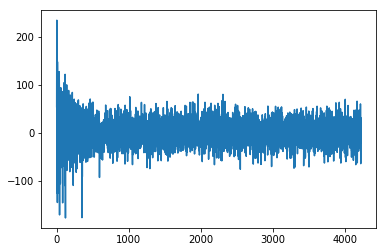

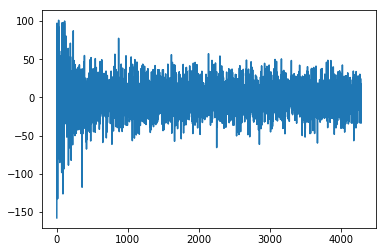

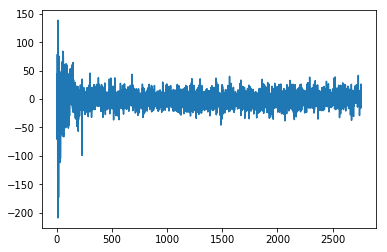

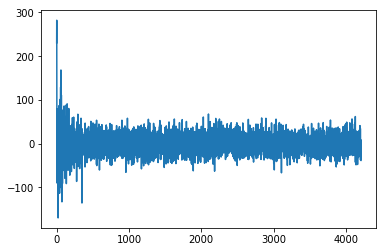

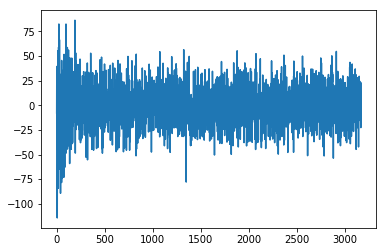

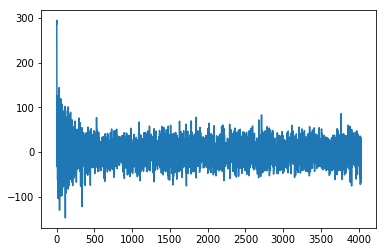

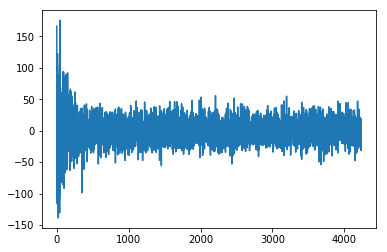

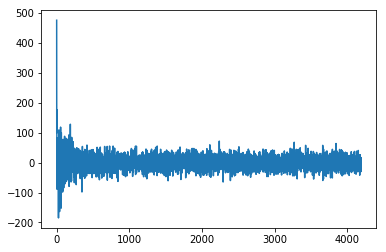

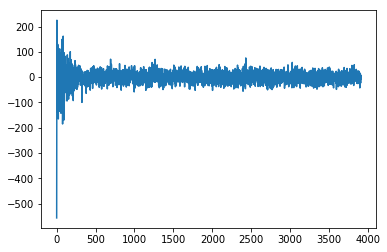

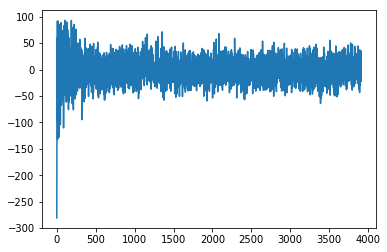

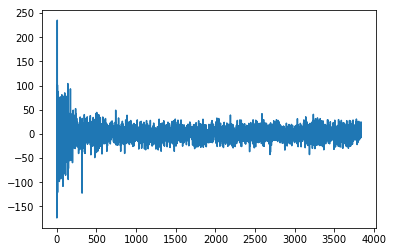

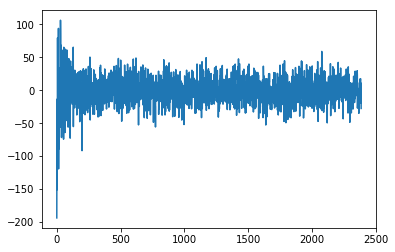

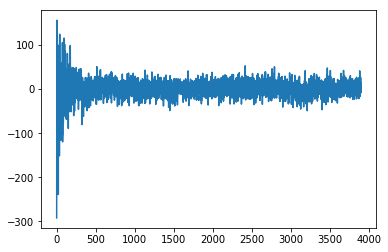

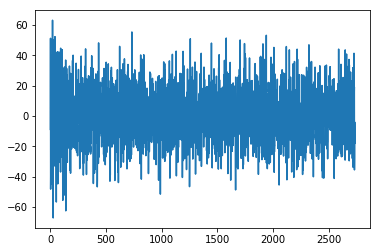

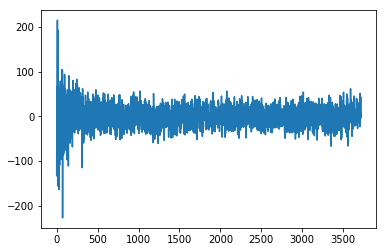

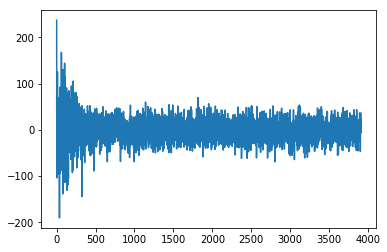

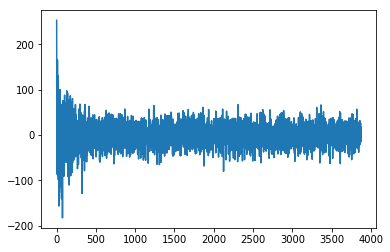

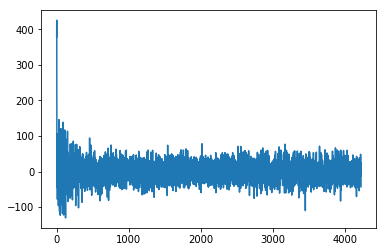

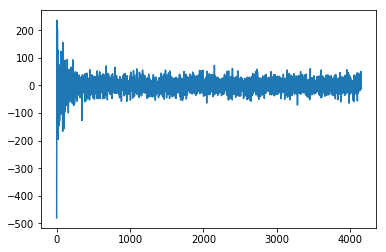

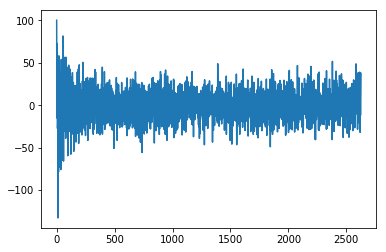

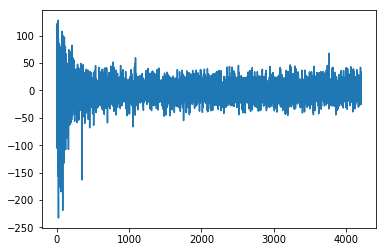

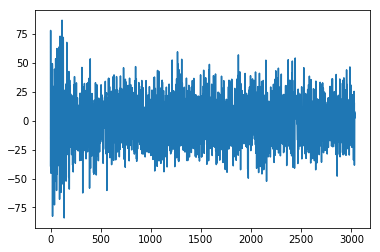

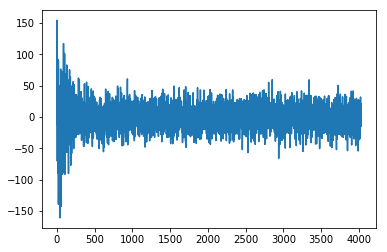

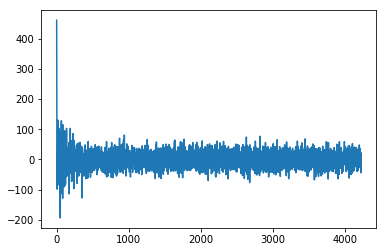

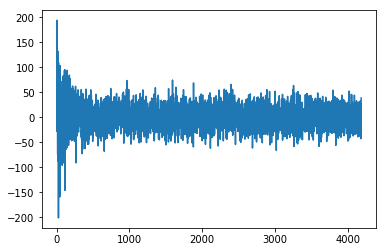

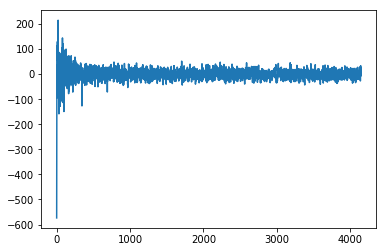

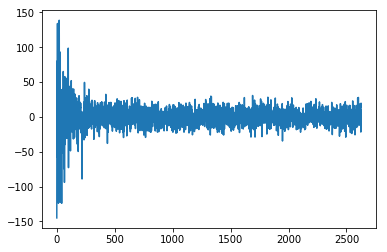

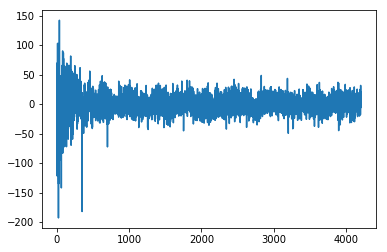

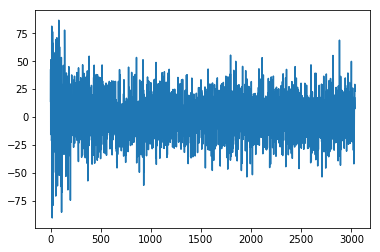

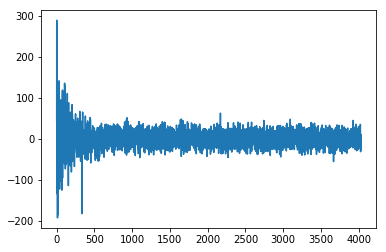

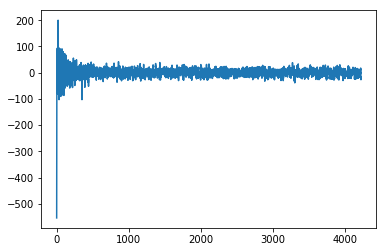

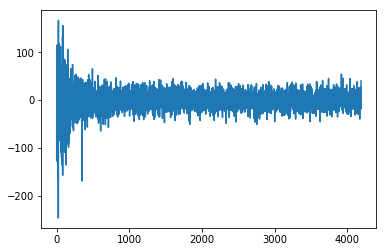

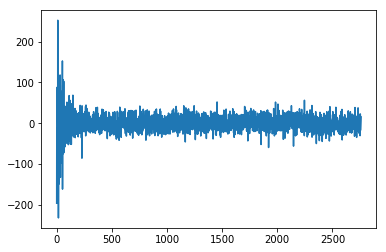

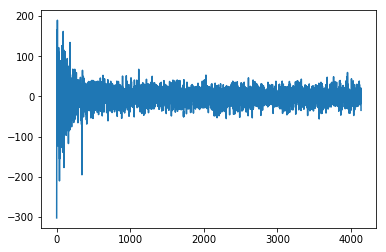

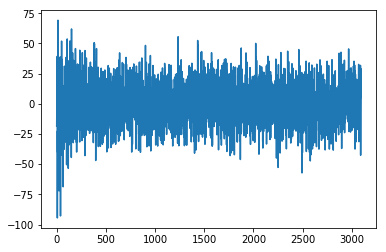

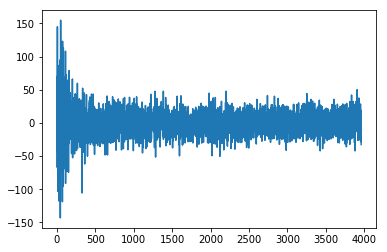

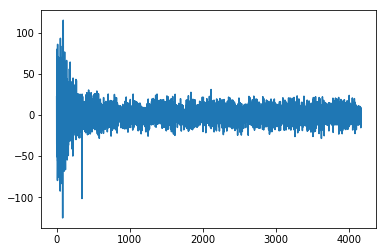

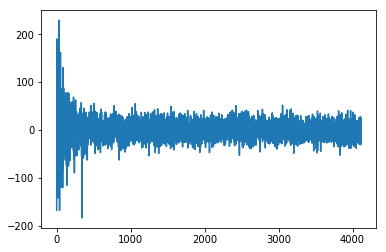

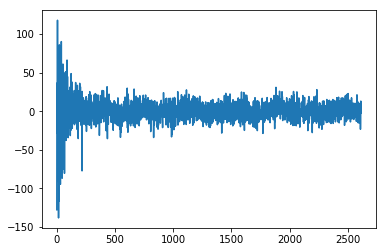

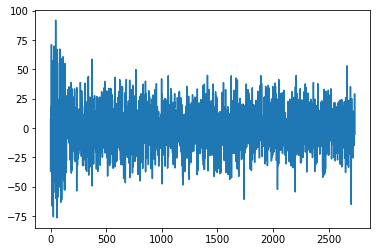

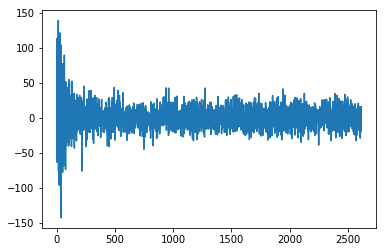

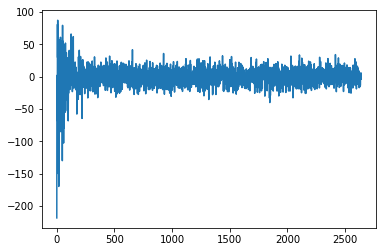

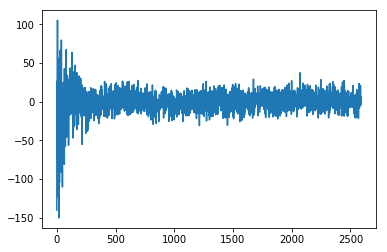

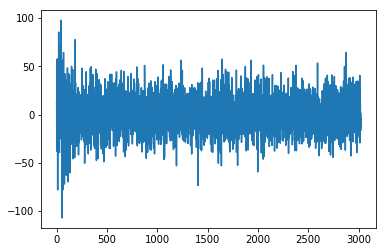

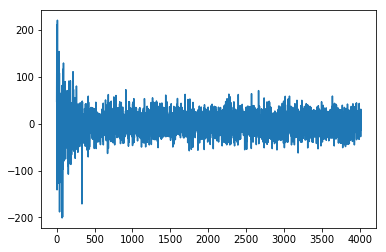

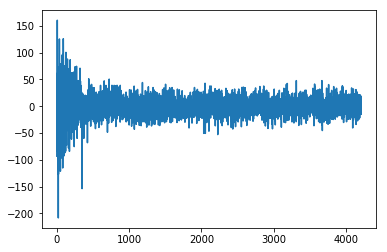

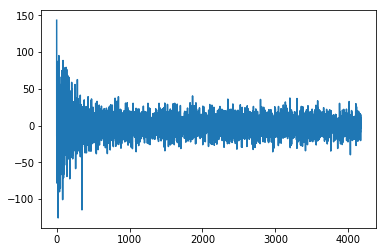

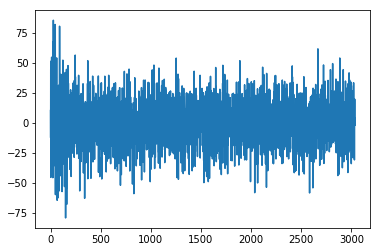

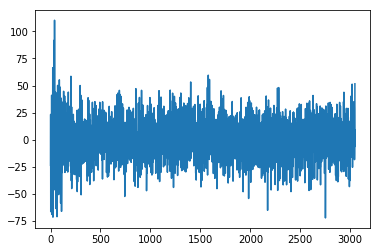

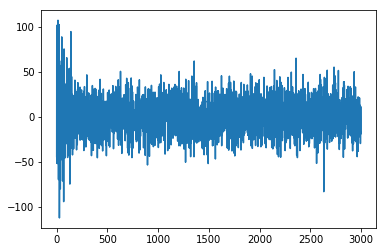

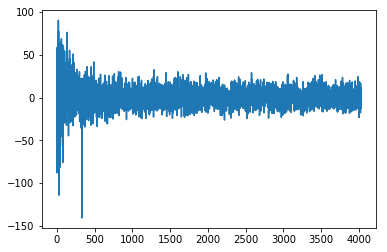

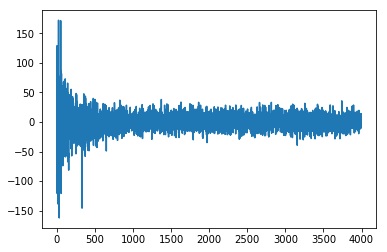

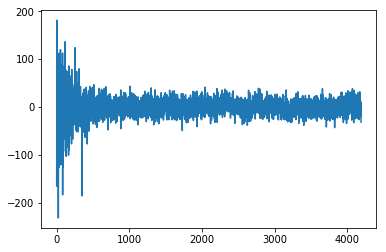

In [104]:
for value1 in sorted_values.values():
    plt.plot(np.fft.rfft(value1)[1:])
    plt.show()    